# Machine Learning For Disaster - Titanic

"RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in 1912 after the ship struck an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it one of modern history's deadliest peacetime commercial marine disasters. RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. She was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, chief naval architect of the shipyard at the time, died in the disaster." - Wikipedia

The purpose of this exercise is to predict whether a person survived the sinking of the ship/not? And what factors had more impact on people not surviving the sinking of the titanic.

# lmport Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import re

# Load The Data

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 

# Explore The Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Set PassengerId as an Index Column

In [4]:
df.set_index('PassengerId',inplace = True)

In [5]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [6]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [7]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

How many males and females were aboard the ship?

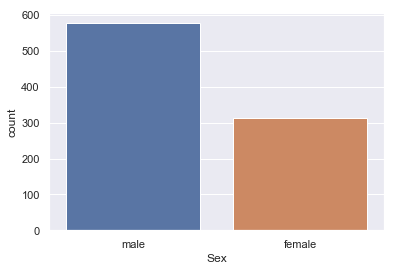

In [8]:
sns.countplot('Sex',data = df)

How many males and females were in each class?

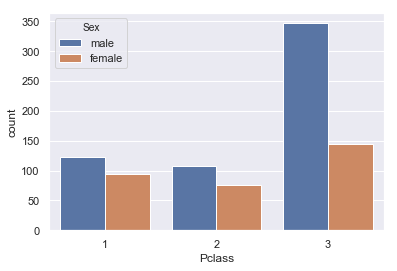

In [9]:
sns.countplot('Pclass',data = df, hue = 'Sex')

Finding out whether a person was a child, man or woman.

In [10]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'Child'
    else:
        return sex

In [11]:
df['Person'] = df[['Age','Sex']].apply(male_female_child, axis = 1)

In [12]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female


How many males, females and children were aboard?

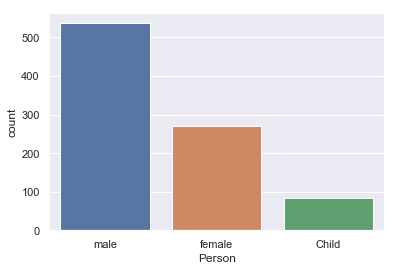

In [13]:
sns.countplot('Person', data = df)

How many males, females and Children were aboard?

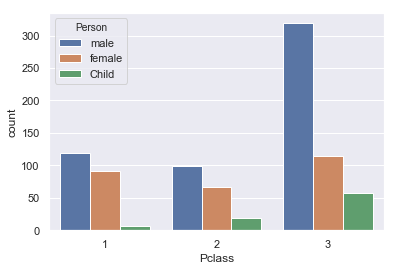

In [14]:
sns.countplot('Pclass', data = df, hue = 'Person')

How many people were aboard? by age group.

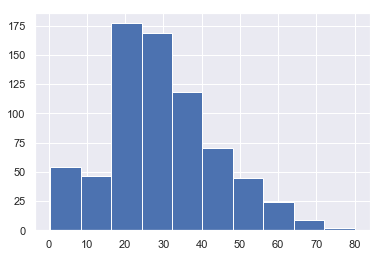

In [15]:
df['Age'].hist(bins = 10)

Average Age

In [16]:
df.Age.mean()

29.69911764705882

Age distribution by Gender

C:\ANACONDA\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


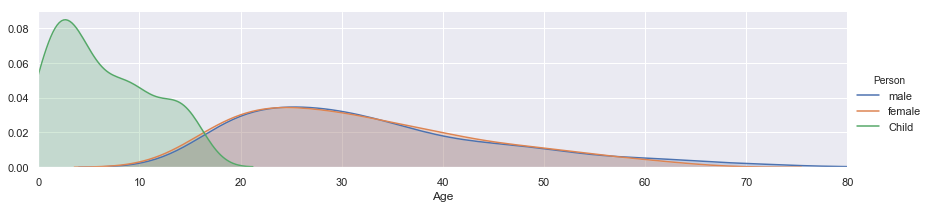

In [17]:
fig = sns.FacetGrid(df, hue = 'Person', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = df.Age.max()
fig.set(xlim = (0, oldest))
fig.add_legend()

Age Distribution By Person

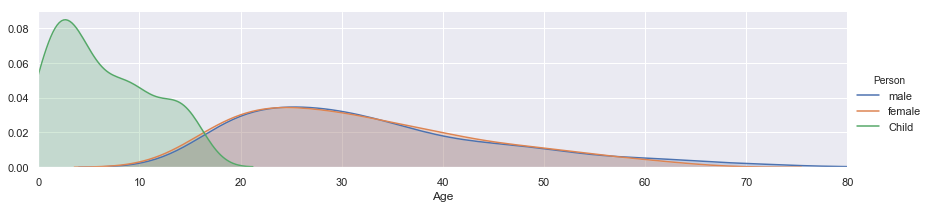

In [18]:
fig = sns.FacetGrid(df, hue = 'Person', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = df.Age.max()
fig.set(xlim = (0, oldest))
fig.add_legend()

Age Distribution by Ticket Class

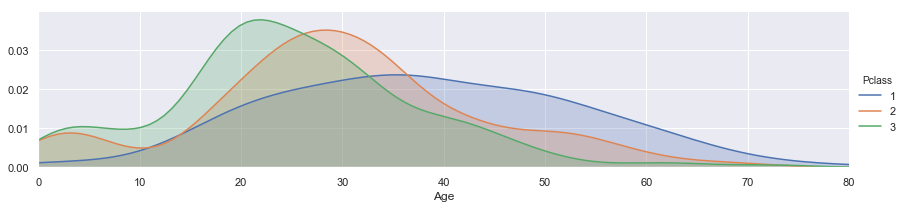

In [19]:
fig = sns.FacetGrid(df, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = df.Age.max()
fig.set(xlim = (0, oldest))
fig.add_legend()

In [20]:
df.Cabin.isna().sum()

687

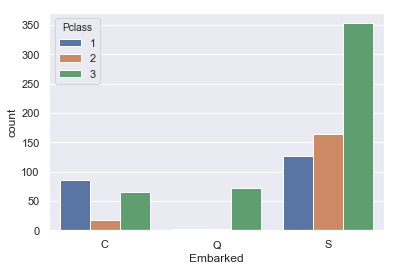

In [21]:
sns.countplot('Embarked', data = df, hue = 'Pclass', order = ['C', 'Q', 'S'])

In [22]:
#who was alone and who was with family?

In [23]:
df['Family'] = df['SibSp'] + df['Parch'] 

In [24]:
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Child,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,2


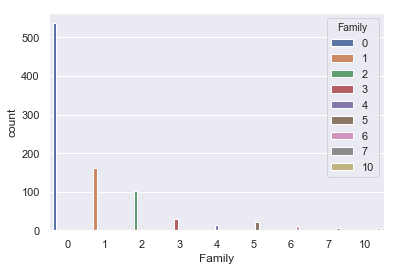

In [25]:
sns.countplot('Family', data = df, hue = 'Family')

##### SURVIVAL RATE

Exploring the effect the variables have on the survival rate

How many people survived and how many died?

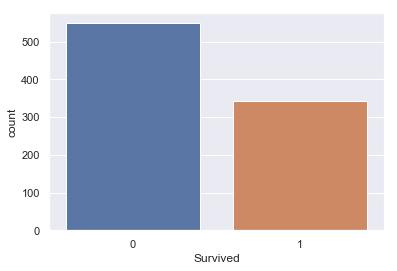

In [26]:
sns.countplot('Survived', data = df)

Did having a family member increase/decrease your chances of survival?

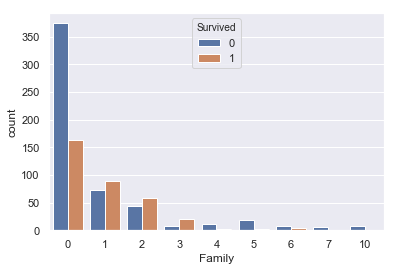

In [27]:
sns.countplot('Family', data = df, hue = 'Survived')

Did being in a certain class improve your chance of survival?

C:\ANACONDA\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


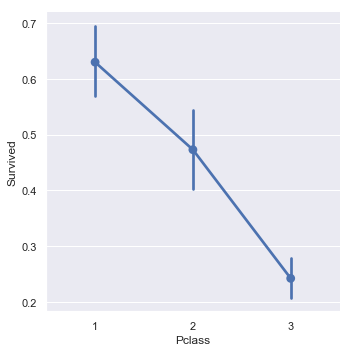

In [28]:
sns.factorplot(x = 'Pclass',y = 'Survived', data = df)

Taking a class into consideration, did being a Male, Female or Child improve your chances of survival?

C:\ANACONDA\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


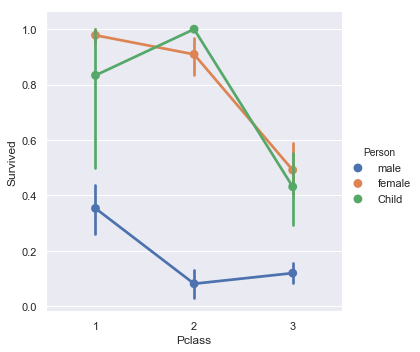

In [29]:
sns.factorplot(x = 'Pclass',y = 'Survived', data = df, hue = 'Person')

Did having a certain age increase your chances of survival or not?

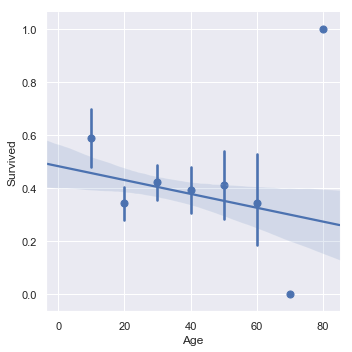

In [30]:
sns.lmplot('Age','Survived', data = df, x_bins = [10, 20, 30, 40, 50, 60, 70, 80])

Taking which class a passenger was in into consideration, did having a certain Age increase your chances of survival or not?

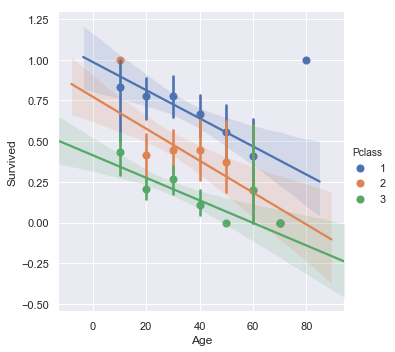

In [31]:
sns.lmplot('Age','Survived', data = df, hue = 'Pclass', x_bins = [10, 20, 30, 40, 50, 60, 70, 80])

Did having a certain  age and gender increase your chances of survival?

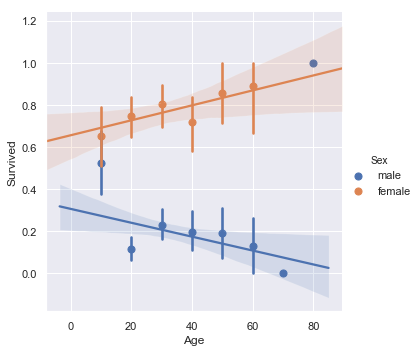

In [32]:
sns.lmplot('Age','Survived', data = df, hue = 'Sex', x_bins = [10, 20, 30, 40, 50, 60, 70, 80])

Did being a male, female, or child and have a family increase your survival chances?

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 13 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
Person      891 non-null object
Family      891 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 137.5+ KB


To study correlation between the features

In [34]:
#create a visual showing whether Cabin had an impact

# Feature Engineering

We want to create features from the existing features and use them in our modelling instead.

Extract the title from the Name of a passenger to see whether that will have an impact on someone's survival chances

In [35]:
def create_status(name):
    m = re.search(" [A-Za-z]+\.", name)
    if m:
        status = re.sub('\.', '', re.sub(" ", "", m.group(0)))
        return status
    else:
        return "None"

In [36]:
df['Status'] = df['Name'].apply(create_status)

We want to assign the missing ages with the mean age in the ticket class.

In [37]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return round(df['Age'][(df["Pclass"]==1)].mean())

        elif Pclass == 2:
            return round(df['Age'][(df["Pclass"]==2)].mean())

        else:
            return round(df['Age'][(df["Pclass"]==2)].mean())

    else:
        return Age

In [38]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

How many passengers have a certain title?

In [39]:
df.Status.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Jonkheer      1
Ms            1
Capt          1
Lady          1
Mme           1
Countess      1
Don           1
Sir           1
Name: Status, dtype: int64

We want to group the titles who have are very rare to appear into as 'Other'

In [40]:
Others = ['Master', 'Dr', 'Rev', 'Major', 'Col', 'Mlle', 'Ms', 'Lady', 'Capt', 'Countess', 'Mme', 'Sir', 'Jonkheer', 'Don']

In [41]:
for title in df.Status:
    if title in Others:
        df.Status = df.Status.replace(title, 'Other')
        

Did having a certain title increase your chances of survival?

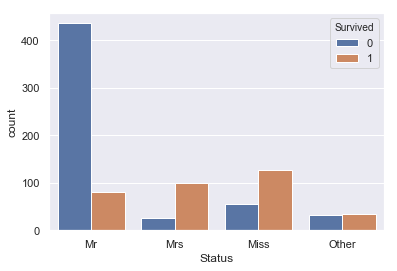

In [42]:
sns.countplot('Status', data = df,hue = 'Survived')

We'll remove the below features in our modelling, SibSp & Parch aree represented by Family, Cabin has a lot of missing values,...

In [44]:
df.drop(['Name','SibSp', 'Parch','Ticket','Cabin', 'Sex'],axis = 1, inplace = True)

In [45]:
df.head()

,Survived,Pclass,Age,Fare,Embarked,Person,Family,Status
PassengerId,,,,,,,,
1,0,3,22.0,7.2500,S,male,1,Mr
2,1,1,38.0,71.2833,C,female,1,Mrs
3,1,3,26.0,7.9250,S,female,0,Miss
4,1,1,35.0,53.1000,S,female,1,Mrs
5,0,3,35.0,8.0500,S,male,0,Mr


In [46]:
#since there are only two missing values and there are most frequent embarked station is S(mode)
df['Embarked'] = df['Embarked'].fillna('S')  

In [47]:
#convert to text since ticket class is a categorical variable
df.Pclass = df.Pclass.map({1 : 'first',2 : 'second', 3 : 'third'})

In [48]:
df= pd.get_dummies(df)

In [49]:
df.head()

,Survived,Age,Fare,Family,Pclass_first,Pclass_second,Pclass_third,Embarked_C,Embarked_Q,Embarked_S,Person_Child,Person_female,Person_male,Status_Miss,Status_Mr,Status_Mrs,Status_Other
PassengerId,,,,,,,,,,,,,,,,,
1,0,22.0,7.2500,1,0,0,1,0,0,1,0,0,1,0,1,0,0
2,1,38.0,71.2833,1,1,0,0,1,0,0,0,1,0,0,0,1,0
3,1,26.0,7.9250,0,0,0,1,0,0,1,0,1,0,1,0,0,0
4,1,35.0,53.1000,1,1,0,0,0,0,1,0,1,0,0,0,1,0
5,0,35.0,8.0500,0,0,0,1,0,0,1,0,0,1,0,1,0,0


In [50]:
df.isna().sum()

Survived         0
Age              0
Fare             0
Family           0
Pclass_first     0
Pclass_second    0
Pclass_third     0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Person_Child     0
Person_female    0
Person_male      0
Status_Miss      0
Status_Mr        0
Status_Mrs       0
Status_Other     0
dtype: int64

To study the correlation between the features

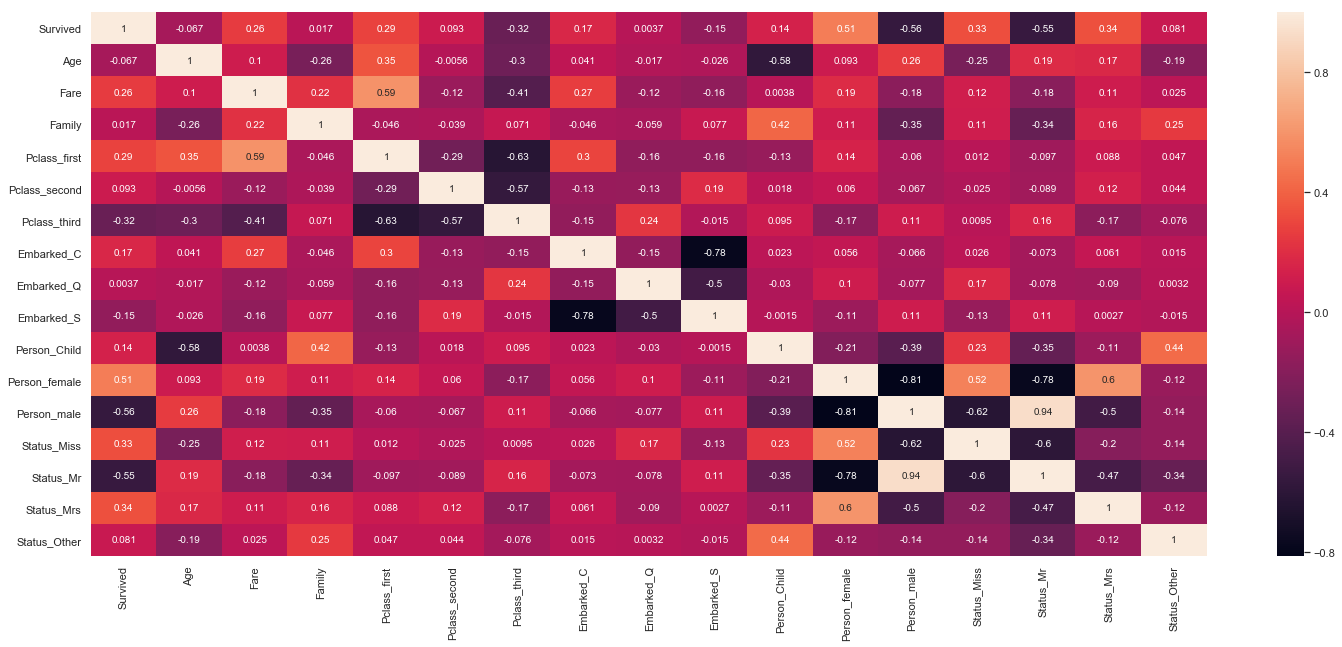

In [51]:
# Create figure and axes
f, a = plt.subplots(figsize = (25,10))

# Create heatmap of correlations
sns.heatmap(data=df.corr(), annot=True)

# Split the Data

In [52]:
y = df['Survived']
X = df.drop('Survived', axis = 1)

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

# Model Training and Evaluating

##### Logistic Regression Model

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logmodel = LogisticRegression()

In [57]:
logmodel.fit(X_train,y_train)

C:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [58]:
log_predictions = logmodel.predict(X_test)

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,log_predictions))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.85      0.71      0.78        80

   micro avg       0.82      0.82      0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.81       179



###### Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
#Instantiate our model
dt = DecisionTreeClassifier()

In [63]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
dt_predictions = dt.predict(X_test)

In [65]:
from sklearn.metrics import classification_report,confusion_matrix

In [66]:
print(classification_report(y_test,dt_predictions))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.76      0.70      0.73        80

   micro avg       0.77      0.77      0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.76      0.77      0.76       179



##### Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
rfc = RandomForestClassifier(n_estimators=600)

In [69]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [70]:
predictions = rfc.predict(X_test)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        99
           1       0.83      0.69      0.75        80

   micro avg       0.80      0.80      0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



##### Adaptive Boosting

In [73]:
from sklearn.ensemble import AdaBoostClassifier

In [74]:
# Instantiate our model
adaboost = AdaBoostClassifier()

In [75]:
# Fit our model to the training data
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [76]:
# Predict on the test data
adaboost_predictions = adaboost.predict(X_test)

In [77]:
from sklearn.metrics import classification_report,confusion_matrix

In [78]:
print(classification_report(y_test,adaboost_predictions))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        99
           1       0.84      0.72      0.78        80

   micro avg       0.82      0.82      0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.81       179



##### Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

In [80]:
# Instantiate our model
gb = GradientBoostingClassifier()

In [81]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [82]:
gb_predictions = gb.predict(X_test)

In [83]:
print(classification_report(y_test,gb_predictions))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        99
           1       0.86      0.75      0.80        80

   micro avg       0.83      0.83      0.83       179
   macro avg       0.84      0.82      0.83       179
weighted avg       0.83      0.83      0.83       179



###### Extreme Gradient Boosting

In [84]:
from xgboost import XGBClassifier

In [85]:
xg = XGBClassifier()    # Instantiate our model

In [86]:
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [87]:
xg_predictions = xg.predict(X_test)

In [88]:
print(classification_report(y_test,xg_predictions))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        99
           1       0.94      0.72      0.82        80

   micro avg       0.85      0.85      0.85       179
   macro avg       0.87      0.84      0.85       179
weighted avg       0.87      0.85      0.85       179



In [89]:
(xg.feature_importances_)

array([0.02058631, 0.02332555, 0.03794396, 0.05475134, 0.0149073 ,
       0.17266987, 0.01985582, 0.        , 0.03183443, 0.        ,
       0.01115428, 0.33563045, 0.00983064, 0.24385607, 0.00794159,
       0.01571238], dtype=float32)

##### Bagging Classifier

In [90]:
from sklearn.ensemble import BaggingClassifier

In [91]:
bag = BaggingClassifier()   #Instantiate our model

In [92]:
# Fit our model to the training data
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [93]:
# Predict on the test data
bag_predictions = bag.predict(X_test)

In [94]:
print(classification_report(y_test,bag_predictions))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        99
           1       0.85      0.69      0.76        80

   micro avg       0.80      0.80      0.80       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.80      0.80       179



###### Since the gradient boosting method gave us the highest predictive accuracy, we'll use it as our model results

## Load the Test Data And Use the XGBoost Model

In [95]:
test= pd.read_csv('test.csv')

In [96]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [97]:
test = test.set_index("PassengerId")

In [98]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [99]:
#a more accurate way of cleaning data or filling null values of Age using the average of the classes 
def impute_age_test(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return round(test['Age'][(test["Pclass"]==1)].mean()) #mean of the  the first class 
        elif Pclass==2:
            return round(test['Age'][(test["Pclass"]==2)].mean()) #mean of the  the second class
        else:
            return round(test['Age'][(test["Pclass"]==3)].mean()) #mean of the  the third class
    else:
        return Age

In [100]:
test['Age']=test[['Age','Pclass']].apply(impute_age_test,axis =1)

In [101]:
Others = ['Dona','Master', 'Dr', 'Rev', 'Major', 'Col', 'Mlle', 'Ms', 'Lady', 'Capt', 'Countess', 'Mme', 'Sir', 'Jonkheer', 'Don']

In [102]:
def create_status(name):
    m = re.search(" [A-Za-z]+\.", name)
    if m:
        status = re.sub('\.', '', re.sub(" ", "", m.group(0)))
        return status
    else:
        return "None"

In [103]:
test['Status'] = test['Name'].apply(create_status)

In [104]:
for title in test.Status:
    if title in Others:
        test.Status = test.Status.replace(title, 'Other')

In [105]:
test['Family'] = test['SibSp'] + test['Parch'] 

In [106]:
def male_female_child(passenger):
    age, sex = passenger
    if age < 16:
        return 'Child'
    else:
        return sex

In [107]:
test['Person'] = test[['Age','Sex']].apply(male_female_child, axis = 1)

In [108]:
test.Pclass = test.Pclass.map({1 : 'first',2 : 'second', 3 : 'third'})

In [109]:
test.drop(['Name','SibSp', 'Parch','Ticket','Cabin', 'Sex'],axis = 1, inplace = True)

In [110]:
test.head(10)

,Pclass,Age,Fare,Embarked,Status,Family,Person
PassengerId,,,,,,,
892,third,34.5,7.8292,Q,Mr,0,male
893,third,47.0,7.0000,S,Mrs,1,female
894,second,62.0,9.6875,Q,Mr,0,male
895,third,27.0,8.6625,S,Mr,0,male
896,third,22.0,12.2875,S,Mrs,2,female
897,third,14.0,9.2250,S,Mr,0,Child
898,third,30.0,7.6292,Q,Miss,0,female
899,second,26.0,29.0000,S,Mr,2,male
900,third,18.0,7.2292,C,Mrs,0,female


In [111]:
test = pd.get_dummies(test)

In [112]:
test.head()

,Age,Fare,Family,Pclass_first,Pclass_second,Pclass_third,Embarked_C,Embarked_Q,Embarked_S,Status_Miss,Status_Mr,Status_Mrs,Status_Other,Person_Child,Person_female,Person_male
PassengerId,,,,,,,,,,,,,,,,
892,34.5,7.8292,0,0,0,1,0,1,0,0,1,0,0,0,0,1
893,47.0,7.0000,1,0,0,1,0,0,1,0,0,1,0,0,1,0
894,62.0,9.6875,0,0,1,0,0,1,0,0,1,0,0,0,0,1
895,27.0,8.6625,0,0,0,1,0,0,1,0,1,0,0,0,0,1
896,22.0,12.2875,2,0,0,1,0,0,1,0,0,1,0,0,1,0


In [113]:
test = test[['Age', 'Fare', 'Family', 'Pclass_first', 'Pclass_second', 'Pclass_third', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Person_Child', 'Person_female', 'Person_male', 'Status_Miss', 'Status_Mr', 'Status_Mrs', 'Status_Other']]

In [114]:
test['Survived'] = xg.predict(test)

In [115]:
test.reset_index(inplace=True)

In [116]:
submission = test[['PassengerId','Survived']]
submission.to_csv('Test_Predictions.csv', index = False)